In [1]:
import cv2
import matplotlib.pyplot as plt

from pathlib import Path
from ultralytics import YOLOWorld

In [2]:
import utils

import importlib
importlib.reload(utils)

<module 'utils' from '/home/tom/Documents/UNT/csce6260/projects/kitti-experiments/rgb/utils.py'>

## Load data

In [3]:
base = Path.home() / "kitti"
train_dir = base / "training"
train_img_dir = train_dir / "image_2"
kitti_images_train = sorted(train_img_dir.glob("*.png"))

## Open World Detection Model Initialization

In [4]:
model = YOLOWorld("yolov8x-worldv2.pt")
target_classes = ["car", "van", "truck", "pedestrian", "person_sitting", "cyclist", "tram"]  
class_map = {idx:class_name for idx, class_name in enumerate(target_classes)}
print(target_classes)
model.set_classes(target_classes)

['car', 'van', 'truck', 'pedestrian', 'person_sitting', 'cyclist', 'tram']


Sample Image Path: /home/tom/kitti/training/image_2/000000.png



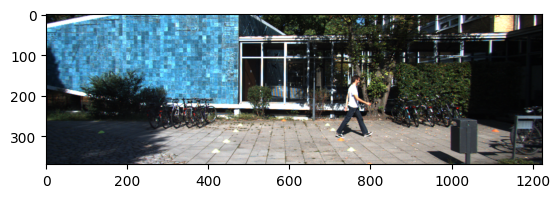

In [5]:
analysis_file_index = 0
sample_image_path = kitti_images_train[analysis_file_index]
print("Sample Image Path: {}\n".format(sample_image_path))
sample_image = cv2.imread(sample_image_path)
sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_image_rgb)

In [6]:
det_boxes, det_class_ids, det_scores = utils.perform_detection_and_nms(model, sample_image, det_conf=0.35, nms_threshold=0.25)
print(det_boxes)
print(det_class_ids)
print(det_scores)


0: 224x640 1 person_sitting, 526.0ms
Speed: 10.1ms preprocess, 526.0ms inference, 1.1ms postprocess per image at shape (1, 3, 224, 640)
[     712.97      151.36      805.61      304.69]
4
0.6992638


In [7]:
det_boxes

array([     712.97,      151.36,      805.61,      304.69], dtype=float32)